套件安裝
```cmd=
pip install git+https://github.com/keras-team/keras-tuner.git
pip install autokeras
```

# AutoKeras MNIST 辨識

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


In [2]:
# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


下面程式執行後，會出現採用的最佳參數
![](https://ithelp.ithome.com.tw/upload/images/20200930/20001976vPSqBmSr0U.png)


In [3]:
import autokeras as ak

# 初始化影像分類器(image classifier)
model = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# 訓練模型
model.fit(x_train, y_train, epochs=10)


Trial 1 Complete [00h 01m 15s]
val_loss: 0.03776610642671585

Best val_loss So Far: 0.03776610642671585
Total elapsed time: 00h 01m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1606 - accuracy: 0.9511
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 9/10

In [4]:
# 預測
predicted_y = model.predict(x_test)

# 評估，打分數
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9869
[0.03951137512922287, 0.9868999719619751]


In [5]:
# 比較 20 筆
print('prediction:', ' '.join(predicted_y[0:20].ravel()))
print('actual    :', ' '.join(y_test[0:20].astype(str)))


prediction: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4
actual    : 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4


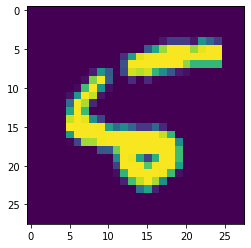

In [6]:
# 顯示錯誤的資料圖像
import matplotlib.pyplot as plt

X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [7]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

X_ALL = np.empty((0, 28, 28))
for i in range(10): 
    image1 = io.imread(f'./myDigits/{i}.png', as_gray=True)
    #image1 = Image.open(uploaded_file).convert('LA')
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    # 反轉顏色
    # 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
    # 還原特徵縮放
    X1 = (np.abs(1-X1) * 255).astype(int)
    X_ALL = np.concatenate([X_ALL, X1])
predictions = model.predict(X_ALL)
print(predictions)

[['0']
 ['1']
 ['2']
 ['3']
 ['4']
 ['5']
 ['6']
 ['7']
 ['8']
 ['9']]
